# CE 295 - Energy Systems and Control
## Ursan Tchouteng Njike, SID 3033216253
## Prof. Daniel Arnold
## Due Date 02/08/2021

## Ursan_Tchouteng_Njike_HW1.ipynb

***
## HW 1 : Battery Modeling, Analysis, and Control
***
## **Problem 2: Summary of Readings**
#### <div align=center><b> Drivers for change </b></div> 
    
$\;\;\;\;\;\;$ There are five drivers for innovoation towards smart grids. This drivers are decarbonization, reliability in the face of growing demands, electrification of transportation, empowered consumers, and market designs and regulatory paradigms. In the past 150 years, electricity have steadily contributed to the advancement in global decarbonization. This has been done by shifting our source of electricity from coal, and we are slowly adopting renewable power production. On the other hand, the worlds population is increasing at an exponential rate. Therefore, there will be a need to efficiently provide electricity to the resulting growing demand. In addition, our transportation system is shifting towards electrification, which could yield in a transportable grid integrated system. Another driver for change is the evolution of communication technologies, which include the IoT. Lastly, a shift towards a free market will drive innovations through a competitive market. <br>
$\;\;\;\;\;\;$The three enabling factors towards a smart grid are technology, standards, and policy. Through technology, innovation on grids information and communication technologies is necessary as well as power electronics and better control systems. standards and interoperability wil play a vital role in building high performing subcomponents of the smart grid. Policy around decarbonization and in favor of Global priorities will help accelerate innovations towards smart grid.
    
## **Problem 3: Black-box vs. White-box Modeling**
 || Black-Box Models | White-Box Models    |  
|:---|:-------------|:-----------|
| Advantanges | They don't require the understanding of the process | They yield explanatory models | 
| | Can predict processes with lack of first principle understanding | They extrapolate the system behavior | 
| | Defining a mathematical model is not required | They can be formulated even if the real system does not exist      | 
| Disadvantages | They expose to errors or misuse | Defining the mathematical model is not trivial |
|  | They are difficult to extrapolate | The understanding of first principle is required |
| | The resulting models are usually not explanatory models  | They process must be understood |

## **Problem 4: Mathematical Modeling Uses**
* **Analysis**: Given a future trajectory or input $u(t)$, an initial condition $x(0)$, and a system model $\sum$, we look at predicting a future output $y(t)$
* **State Estimation**: Given a system $\sum$ with history of input $u(t)$ and output $y(t)$, we are looking for the state $x(t)$
* **System Design or Planning**: Given an input $u(t)$ and some desired output $y(t)$, we solve for the system $\sum$ that transforms $u(t)$ to $y(t)$
* **Model Identification**: Given an inpute $u(t)$ and an output $y(t)$, we solve for the model $\sum$
* **Control Synthesis**: Given a system $\sum$ with a current state $x(0)$, and a desired output $y(t)$, we solve for the input $u(t)$

## **Problem 5: Mathematical Modeling**

**Part (a)**
* The electrical energy stored in the capacitor 
* The electrical energy stored in the battery cell

**Part (b)**
* $V-R_1I-V_c-OCV(z)=0$
* $\dot{z}(t) = \frac1QI(t)$
* $I = \frac{V_c}{R_2} + C\dot{V}_c$

**Part (c)**
* $R_1, R_2, C,$ and $Q$

**Part (d)**

* $\dot{V_c}=\frac1{CR_2}V_c+\frac1CI$
* $\dot{z}=\frac1QI$
* $V=R_1I+V_c+OCV(z)$

**Part (e)**

$\frac{d}{dt}\begin{bmatrix}V_c \\ z\end{bmatrix}=\begin{bmatrix} -\frac1{CR_2} & 0 \\ 0 & 0 \end{bmatrix}\begin{bmatrix}V_c \\ z\end{bmatrix}+\begin{bmatrix} \frac1C \\ \frac1Q \end{bmatrix}I$

The output does not have a linear state due to the $OVC(z)$ non-linear term

## **Problem 6: Stability and Linearization**
**Part (a)**

If $I = 0$, $OCV(z)=0$. Therefore, current may flow only around the $C$ and $R_2$ loop. Therefore, our system is marginally stable since the current around the loop will eventually stop once the charges on both side of $C$ becomes equal. 

Also, the eigenvalues are $0$ and $-\frac1{CR_2} \implies$marginal stability

**Part (b)**

$V=V_c + R_1I + OCV(z) \implies V=V_c + R_1I + p_o + p_1z + p_2z^2 + p_3z^3$

$\frac{dV}{dz}=p_1 + 2p_2z + 3p_3z^2 \implies \frac{dV}{dz}(z=0.5)=p_1 + p_2 + 0.75p_3$
;$\frac{dV}{dV_c}=1$
;$\frac{dV}{dI}=R_1$
$ V=p_0 + 0.5p_1 + 0.25p_2 + 0.125p_3 - 0.5(p_1 + p_2 + 0.75p_3) + (p_1 + p_2 + 0.75p_3)z + V_c + R_1I$

$\therefore V=\begin{bmatrix} 1 & (p_1 + p_2 + 0.75p_3) \end{bmatrix}\begin{bmatrix}V_c \\ z\end{bmatrix} + R_1I+p_0+0.5p_1+0.25p_2+0.125p_3 - 0.5(p_1 + p_2 + 0.75p_3)$

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
%matplotlib inline
from __future__ import division

fs = 15; # Font Size for plots

## **Problem 7: Simulation and Analysis**

[0.         0.04166667 0.08333333 0.125      0.16666667 0.20833333
 0.25       0.29166667 0.33333333 0.375      0.41666667 0.45833333
 0.5        0.54166667 0.58333333 0.625      0.66666667 0.70833333
 0.75       0.79166667 0.83333333 0.875      0.91666667 0.95833333
 1.        ]
[3.4707     3.53339386 3.58770573 3.63438105 3.67416528 3.70780384
 3.73604219 3.75962576 3.7793     3.79581035 3.80990226 3.82232116
 3.8338125  3.84512172 3.85699427 3.87017559 3.88541111 3.90344629
 3.92502656 3.95089737 3.98180417 4.01849238 4.06170747 4.11219486
 4.1707    ]


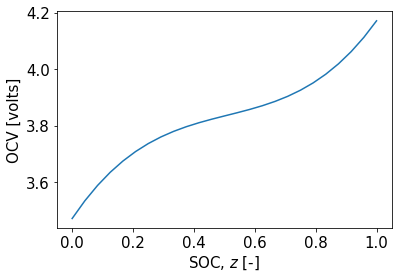

In [10]:
## Part(a): Model Parameters

# ECM Model Parameters
Q =  3600# [Coulombs]
R1 = 0.05# [Ohms]
R2 = 0.005 # [Ohms]
C = 500 # [Farads]

# OCV polynomial coefficients
p_0 = 3.4707
p_1 = 1.6112
p_2 = -2.6287
p_3 = 1.7175

# Plot nonlinear OCV function
z_vec = np.linspace(0,1,25)
OCV = p_0 + p_1*z_vec + p_2*z_vec**2 + p_3*z_vec**3
print(z_vec)
print(OCV)

plt.plot(z_vec,OCV)
plt.xlabel('SOC, $z$ [-]',fontsize=fs)
plt.ylabel('OCV [volts]',fontsize=fs)
plt.tick_params(axis='both', which='major', labelsize=fs)
plt.show()

In [76]:
## Part(b): Simulate

# Assemble (A,B) state-space matrices
A = np.array([[-1/(C*R2),0],
            [0, 0]])
B = np.array([[1/C],
            [1/Q]])
print(A)
print(B)
C_dummy = np.array([1,p_1+p_2+0.75*p_3])
D_dummy = p_0 + 0.5*p_1 + 0.25*p_2+0.125*p_3 -.5*(p_1 + p_2 + 0.75*p_3)
print(C_dummy)
print(D_dummy)

# Create state-space model
sys = signal.lti( A, B, C_dummy, D_dummy)

# Create time vector
DeltaT = 1 # Time step size [sec]
t = np.arange(0,10*60,DeltaT)   # Total Simulation time (min*sec/min)
#print('time')
#print(t)

# Input current signals
#print(np.shape(t))
Current = np.zeros_like(t)*0
for k in range(0, len(Current)):
    if (t[k] % 40) < 20:
        Current[k] = -5

# Initial Conditions
z0 = 0.5 # state-of-charge
V_c0 = 0 # capacitor voltage
x0 = [V_c0, z0] # np.array([[z0],[V_c0]])   # Vectorize initial conditions
print('x0')
print(x0)

print(np.shape(x0))
print(np.shape(Current))
print(np.shape(t))

# Simulate linear dynamics (Read documentation on scipy.signal.lsim)
tsim, y, x = signal.lsim2( sys, Current, t, x0 )

[[-0.4  0. ]
 [ 0.   0. ]]
[[0.002     ]
 [0.00027778]]
[1.       0.270625]
3.6985
x0
[0, 0.5]
(2,)
(600,)
(600,)


In [77]:
# Parse out states
z = x[:,1]
V_c = x[:,0]

# Compute nonlinear output function
V_nl = V_c+R1*Current + p_0 + p_1*z + p_2*z**2 + p_3*z**3

### Compute linearized output function
# Linearization Points
zeq =  0.5  # state-of-charge
V_ceq = 0 # capacitor voltage
Ieq = 0 # Current

V_lin = p_0 + 0.5*p_1 + 0.25*p_2+0.125*p_3 + (z-zeq)*(p_1 + p_2 + 0.75*p_3)+V_c + R1*Current

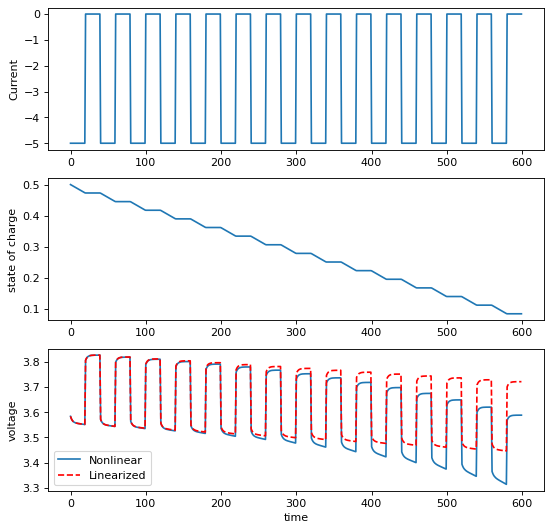

In [78]:
## Part(b): Plot results

# Current
plt.figure(num=2, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(3, 1, 1)
plt.plot(t, Current)
plt.ylabel('Current')

# State-of-charge
plt.subplot(3, 1, 2)
plt.plot(t, z)
plt.ylabel('state of charge')

# Nonlinear and linearized voltage
plt.subplot(3, 1, 3)
plt.plot( t, V_nl,label="Nonlinear")
plt.plot( t, V_lin, 'r--', label="Linearized")
plt.ylabel('voltage' )
plt.xlabel('time' )
plt.legend()

plt.show()

**Part (c)**

This is because Taylor series approximate best when values are closer to the equilibrium point. Therefore, the error will keep increasing with time